In [14]:
#For the below snapshots, The primary is initiated first and the companion is initiated last

import rebound
import numpy as np
sim=rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=300,e=0.05, inc=np.radians(60))
#sim.move_to_com()
sim.integrator="whfast"
#sim.dt=0.05
#sim.status()
#test

import matplotlib.pyplot as plt

Testparticle= 100
a_initial=np.linspace(10,50,Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a,f=np.random.rand()*2.*np.pi,e=0.01)

sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

sim.N_active=2





#Konstantin's Initialization

#sim = rebound.Simulation()
#sim.integrator="whfast"
#sim.add(m = 1)


# set up binary
#a_b = 500
#binary_inc = np.radians(5)
#sim.add(m = 1, a = a_b, inc = binary_inc)


# set up debris disk
#N_particles = 250
#r_min = 20; r_max = 100; disk_width = np.abs(r_min-r_max)
#semi_major_axes_lin = np.linspace(r_min, r_max, N_particles)
#p_sd = -1
#Surface_density = np.array([(r**p_sd) for r in semi_major_axes_lin])
#Surface_density_norm = Surface_density/np.sum(Surface_density)
#Delta_rs = np.array([1/Surface_density_norm[i] for i in range(N_particles)])
#Delta_rs_norm = disk_width * Delta_rs/np.sum(Delta_rs)
#semi_major_axes = np.array([r_min + np.sum(Delta_rs_norm[:i]) for i in range(N_particles)])

#plt.scatter(semi_major_axes, np.linspace(0,1,500), lw =0.1, alpha =0.5)

#anamolies = np.array([2*np.pi*np.random.rand() for N in range(N_particles)])


#i = 0
#for N in range(N_particles):
#    sim.add(m = 0, a = semi_major_axes[i], omega = anamolies[i], primary = sim.particles[0])
    
#    i += 1


In [2]:
#Snapshot.Beginning (No time). (y,z). Debris Disk Diameter = 50 AU
def snapshot_yz(sim):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].y, sim.particles[0].z,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].y, sim.particles[1].z,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$Y$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(sim.particles[i].y, sim.particles[i].z,marker=".",color='k',linewidth=0)

def snapshot_xy(sim):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].x, sim.particles[0].y,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].x, sim.particles[1].y,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Y$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(sim.particles[i].x, sim.particles[i].y,marker=".",color='k',linewidth=0)

def snapshot_xz(sim):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(sim.particles[0].x, sim.particles[0].z,marker=".",color='r',linewidth=5)
    plt.scatter(sim.particles[1].x, sim.particles[1].z,marker=".",color='g',linewidth=5)
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')
    for j in range(sim.N-2):
        i=j+2
        plt.scatter(sim.particles[i].x, sim.particles[i].z,marker=".",color='k',linewidth=0)

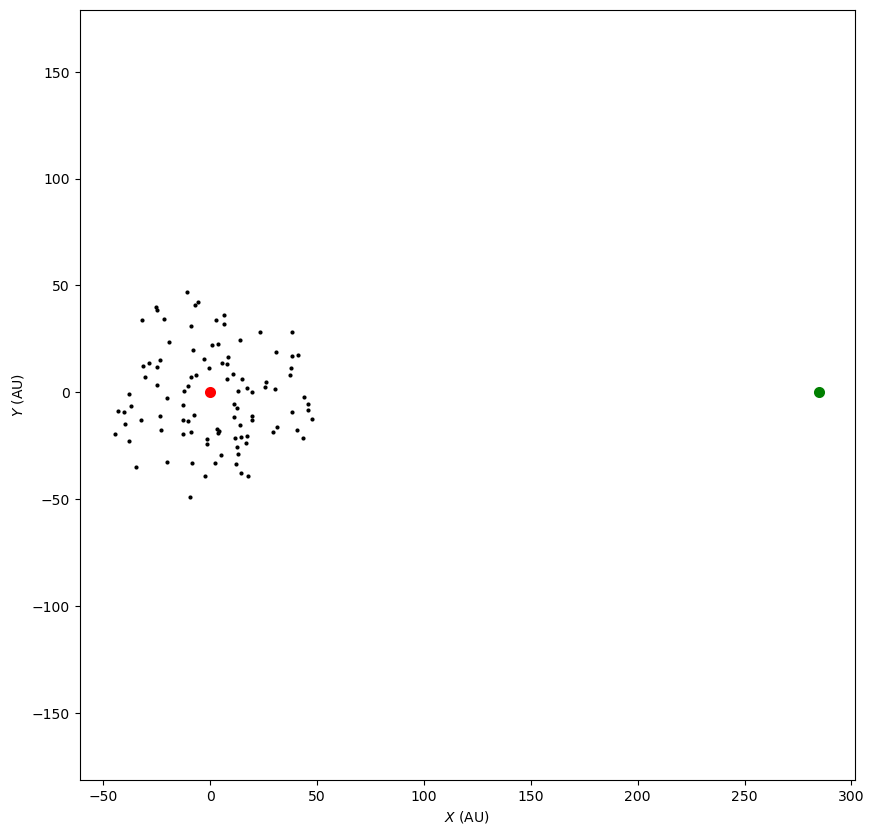

In [3]:
snapshot_xy(sim)

In [15]:
Time=1000000.*2*np.pi
N_out=2000
times=np.linspace(0,Time,N_out)

In [16]:
def time_yz(sim):
    fig = plt.figure(figsize=(10,10))
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$Y$ (AU)")
    ax.axis('equal')
    
    yz=np.zeros((N_out,Testparticle,2))
    for j, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        for k, p in enumerate(sim.particles[1:-1]):
            yz[j][k]=[p.y,p.z]    

        plt.scatter(sim.particles[0].y, sim.particles[0].z,marker=".",color='r',linewidth=5)
        plt.scatter(sim.particles[1].y, sim.particles[1].z,marker=".",color='g',linewidth=5)
        plt.scatter(yz[2:,2:,0],yz[2:,2:,1],marker=".",color='k',linewidth=0)

def time_xy(sim):
    fig = plt.figure(figsize=(10,10))
    ax=plt.subplot()
    ax.set_ylabel("$Y$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')    

    xy=np.zeros((N_out,Testparticle,2))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        for j, p in enumerate(sim.particles[1:-1]):
            xy[i][j]=[p.x,p.y]    
    
        plt.scatter(sim.particles[0].x, sim.particles[0].y,marker=".",color='r',linewidth=5)
        plt.scatter(sim.particles[1].x, sim.particles[1].y,marker=".",color='g',linewidth=5)
        plt.scatter(xy[2:,2:,0],xy[2:,2:,1],marker=".",color='k',linewidth=0)

def time_xz(sim):
    fig = plt.figure(figsize=(10,10))
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')

    xz=np.zeros((N_out,Testparticle,2))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        for k, p in enumerate(sim.particles[1:-1]):
            xz[i][k]=[p.x,p.z]    

        plt.scatter(sim.particles[0].x, sim.particles[0].z,marker=".",color='r',linewidth=5)
        plt.scatter(sim.particles[1].x, sim.particles[1].z,marker=".",color='g',linewidth=5)
        plt.scatter(xz[2:,2:,0],xz[2:,2:,1],marker=".",color='k',linewidth=0)

In [17]:
time_yz(sim)

In [2]:
import rebound
import numpy as np
sim=rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=500, e=0.05,inc=np.radians(5))
#sim.add(m=1, a=300, e=0.05)
sim.move_to_com()
sim.integrator="whfast"
#test

import matplotlib.pyplot as plt


Testparticle= 100
a_initial=np.linspace(20,100,Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a,f=np.random.rand()*2.*np.pi,e=0)
    
sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

sim.N_active=2


Time=1000000.*2*np.pi
N_out=500
xy=np.zeros((N_out,Testparticle,2))
times = np.linspace(0., Time, N_out)


a1 = np.zeros((N_out, sim.N-1))
e1 = np.zeros((N_out, sim.N-1))
inc1 = np.zeros((N_out, sim.N-1))


# loop over each timestep
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    # loop over each particle
    for n in range(sim.N-2):
        m = n+2 # skip primary

        # here i'm assigning the quantities to the matrix I deifned above.
        a1[i][n]=sim.particles[m].calculate_orbit(primary=sim.particles[0]).a
        e1[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).e
        inc1[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).inc

In [1]:
import rebound
import numpy as np
sim=rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=500, e=0.05,inc=np.radians(10))
#sim.add(m=1, a=300, e=0.05)
sim.move_to_com()
sim.integrator="whfast"
#test

import matplotlib.pyplot as plt


Testparticle= 100
a_initial=np.linspace(20,100,Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a,f=np.random.rand()*2.*np.pi,e=0)
    
sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

sim.N_active=2


Time=1000000.*2*np.pi
N_out=500
xy=np.zeros((N_out,Testparticle,2))
times = np.linspace(0., Time, N_out)


a2 = np.zeros((N_out, sim.N-1))
e2 = np.zeros((N_out, sim.N-1))
inc2 = np.zeros((N_out, sim.N-1))


# loop over each timestep
for i,time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    # loop over each particle
    for n in range(sim.N-2):
        m = n+2 # skip primary

        # here i'm assigning the quantities to the matrix I deifned above.
        a2[i][n]=sim.particles[m].calculate_orbit(primary=sim.particles[0]).a
        e2[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).e
        inc2[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).inc

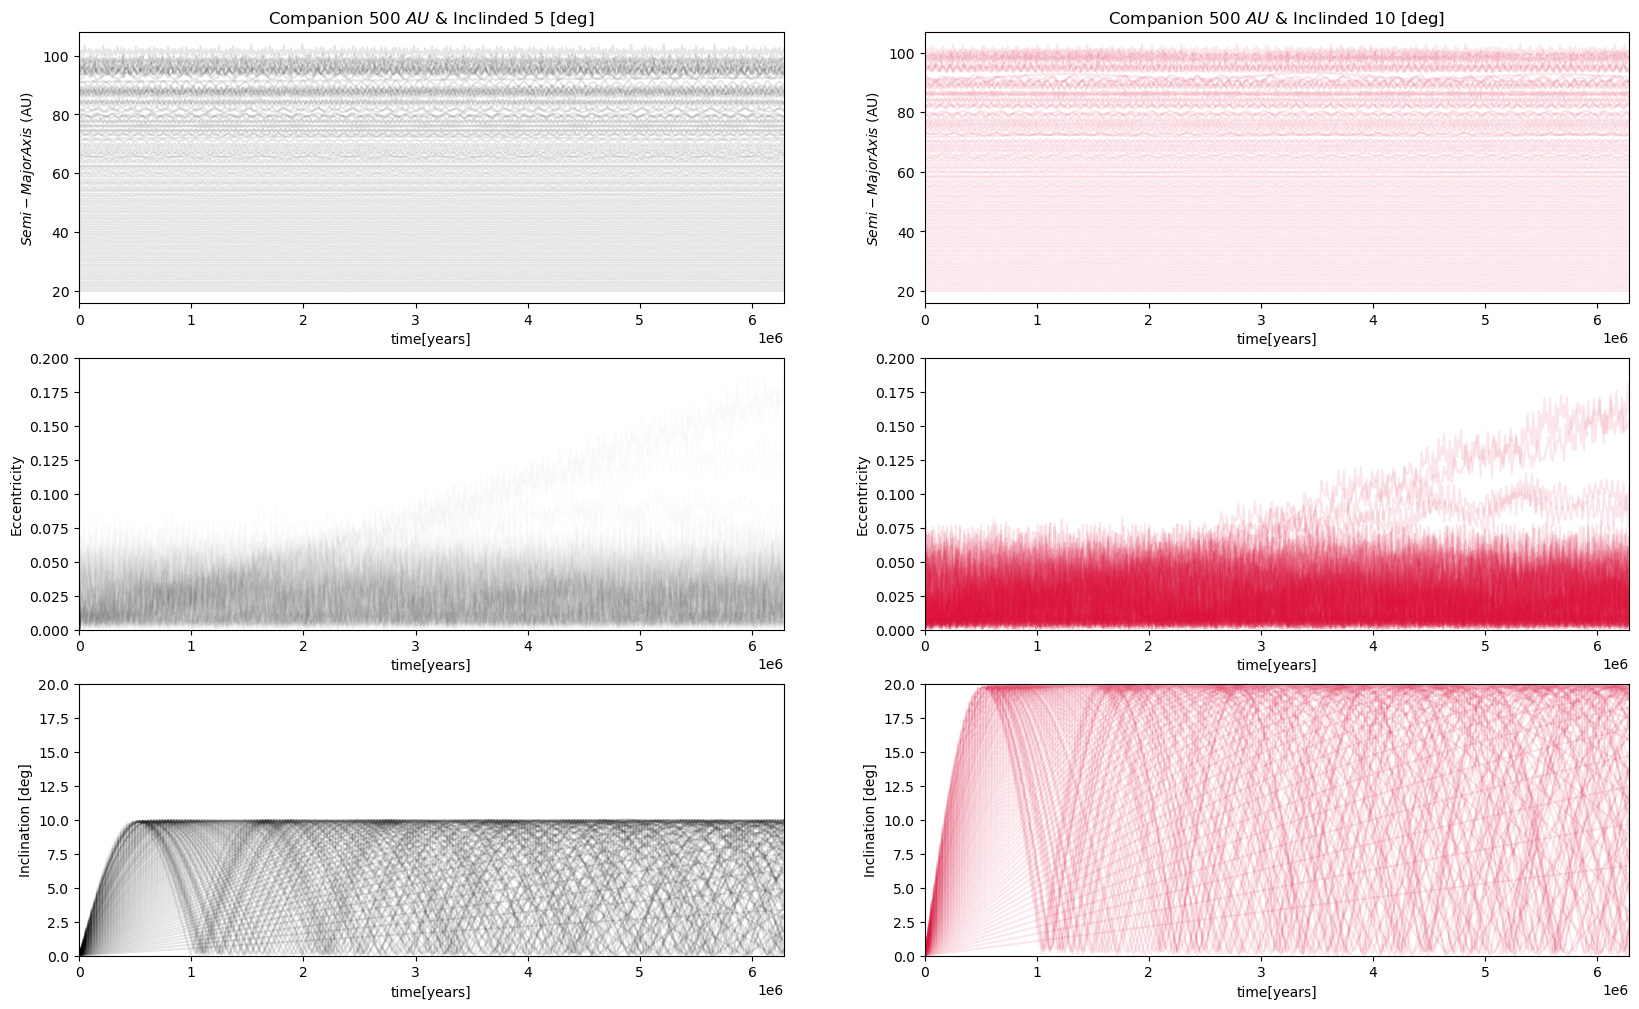

In [3]:

# Maybe Make a plot similar to this, need to define a1, e1, a2 etc. again

fig, ax = plt.subplots(figsize=(20,12), nrows = 3, ncols = 2)


# if i call a[:,:-1] it gives me all times (first entry) and all particles except the last one (which is the binary) (second entry of a)

ax[0,0].plot(times, a1[:,:-1],alpha=.1, color='k')
ax[1,0].plot(times, e1[:,:-1], color ='k',alpha=.01)
#if (a1) <=100 and (a1) >= 80:
    #any = a.all
    #ax[1,0].plot(times, e1[:,:any], color ='b',alpha=.01)
    
ax[2,0].plot(times, np.degrees(inc1[:,:-1]), color = 'k',alpha=.1)

ax[0,1].plot(times, a2[:,:-1],alpha=.1, color='crimson')
ax[1,1].plot(times, e2[:,:-1], color ='crimson',alpha=.1)
ax[2,1].plot(times, np.degrees(inc2[:,:-2]), color = 'crimson',alpha=.1)


ax[0,0].set(ylabel = '$Semi-Major Axis$ (AU)')
ax[1,0].set(ylabel = 'Eccentricity')
ax[2,0].set(ylabel = 'Inclination [deg]')

ax[0,1].set(ylabel = '$Semi-Major Axis$ (AU)')
ax[1,1].set(ylabel = 'Eccentricity')
ax[2,1].set(ylabel = 'Inclination [deg]')

ax[0,0].set_title("Companion 500 $AU$ & Inclinded 5 [deg]")
ax[0,1].set_title("Companion 500 $AU$ & Inclinded 10 [deg]")

ax[1,0].set_ylim(0,.2)
ax[1,1].set_ylim(0,.2)
ax[2,0].set_ylim(0,20)
ax[2,1].set_ylim(0,20)
# make sure the y-limits are the same for each column so comparison is easier

for axi in ax.ravel():
    axi.set(xlabel = 'time[years]', xlim = (times[0], times[-1]))

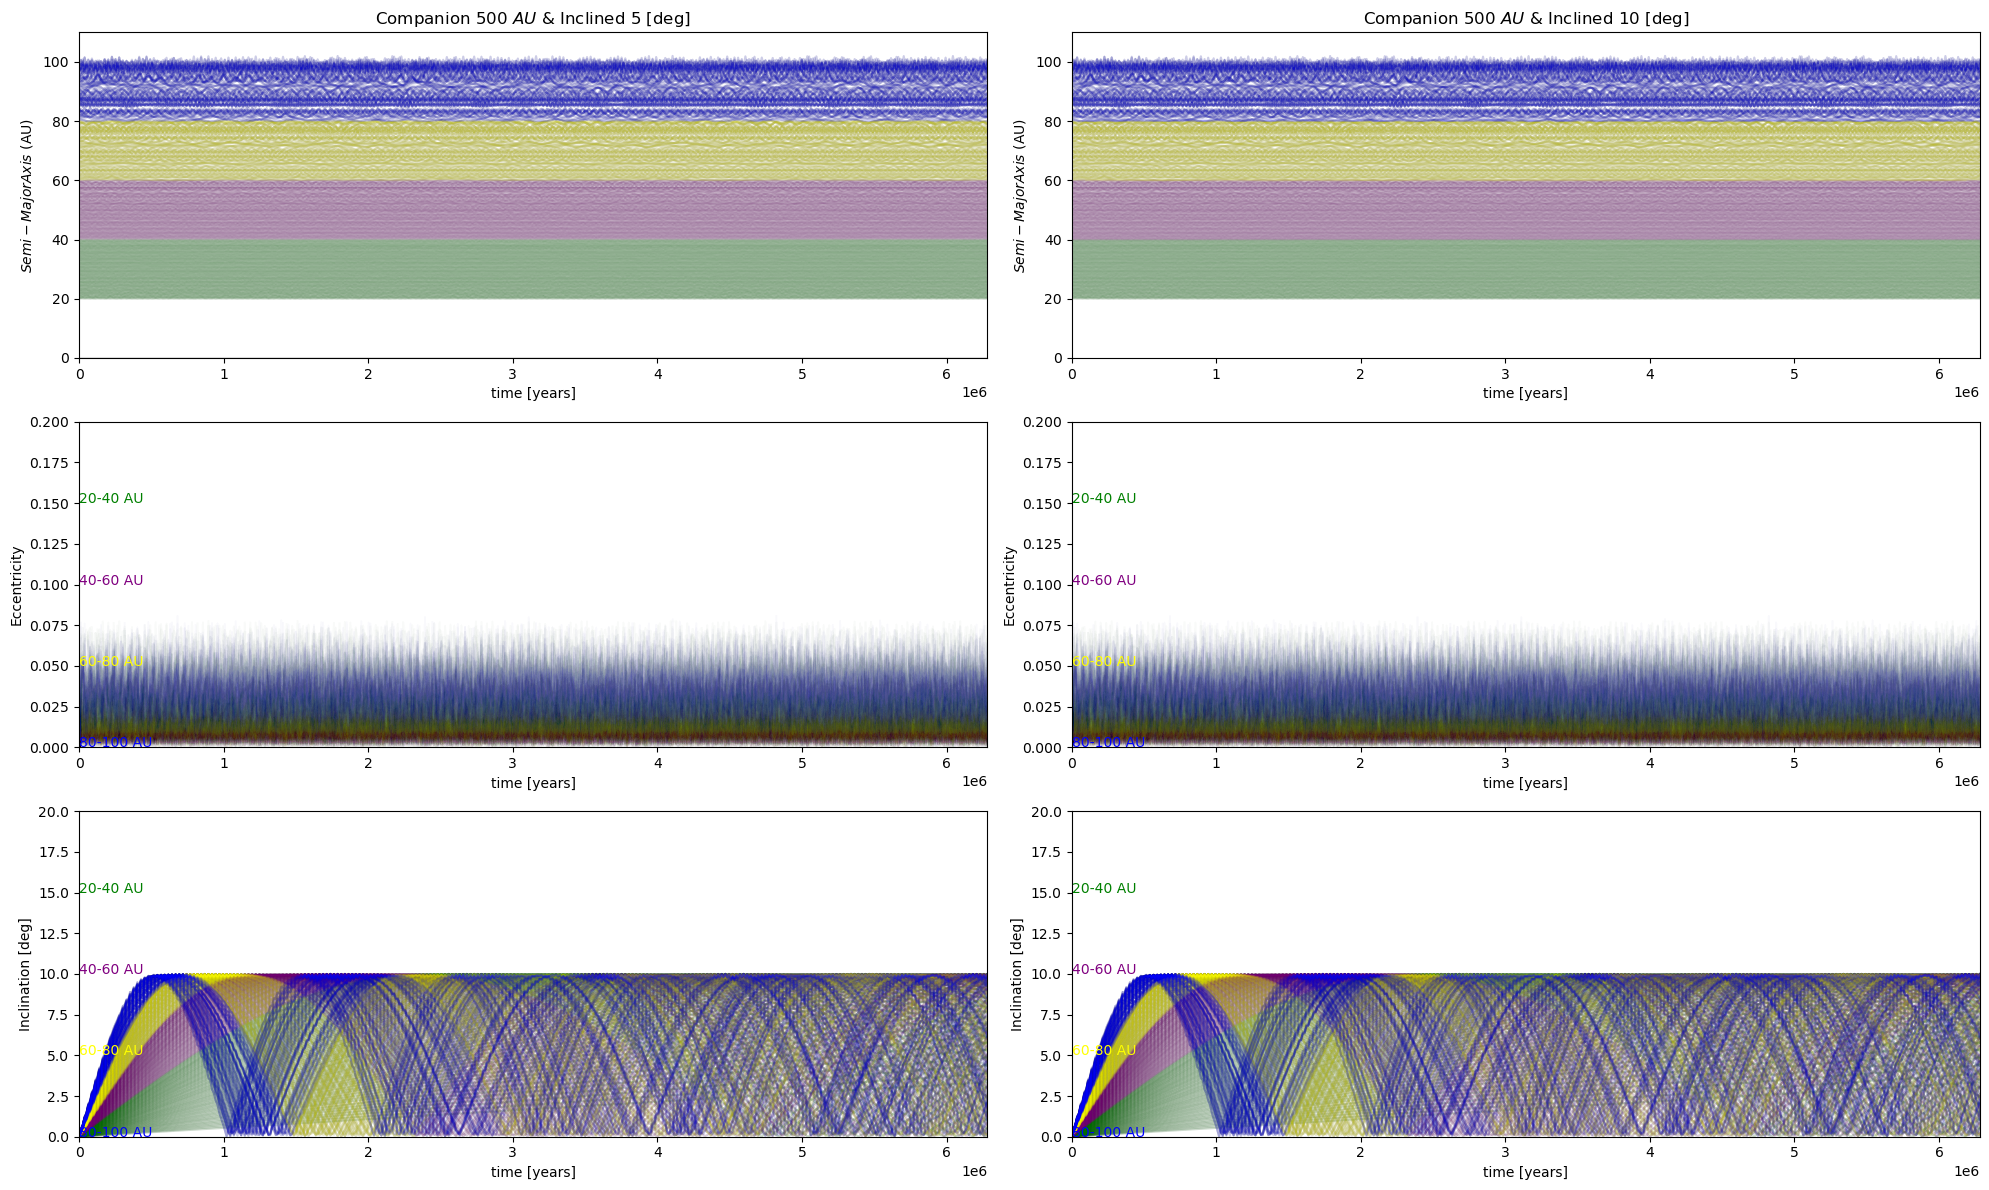

In [13]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=500, e=0, inc=np.radians(5))
sim.move_to_com()
sim.integrator = "whfast"
sim.N_active = 2


Testparticle = 300
a_initial = np.linspace(20, 100, Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a, f=np.random.rand() * 2. * np.pi, e=0)

sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345


Time = 1000000. * 2 * np.pi
N_out = 500
xy = np.zeros((N_out, Testparticle, 2))
times = np.linspace(0., Time, N_out)

a1 = np.zeros((N_out, sim.N-1))
e1 = np.zeros((N_out, sim.N-1))
inc1 = np.zeros((N_out, sim.N-1))

# loop over each timestep
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    # loop over each particle (starting from index 1 since the primary star is the first particle and the binary companion is the second)
    for n in range(sim.N-2):
        m=n+2
        # here i'm assigning the quantities to the matrix I defined above.
        a1[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).a
        e1[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).e
        inc1[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).inc

a2 = np.zeros((N_out, sim.N-1))
e2 = np.zeros((N_out, sim.N-1))
inc2 = np.zeros((N_out, sim.N-1))

# loop over each timestep
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    # loop over each particle (starting from index 1 since the primary star is the first particle and the binary companion is the second)
    for n in range(sim.N-2):
        m=n+2
        # here i'm assigning the quantities to the matrix I defined above.
        a2[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).a
        e2[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).e
        inc2[i][n] = sim.particles[m].calculate_orbit(primary=sim.particles[0]).inc

# Create masks for particles within different semi-major axis ranges
mask_a1_20_40 = (a1 >= 20) & (a1 <= 40)
mask_a1_40_60 = (a1 > 40) & (a1 <= 60)
mask_a1_60_80 = (a1 > 60) & (a1 <= 80)
mask_a1_80_100 = (a1 > 80) & (a1 <= 125)

mask_a2_20_40 = (a2 >= 20) & (a2 <= 40)
mask_a2_40_60 = (a2 > 40) & (a2 <= 60)
mask_a2_60_80 = (a2 > 60) & (a2 <= 80)
mask_a2_80_100 = (a2 > 80) & (a2 <= 125)

fig, ax = plt.subplots(figsize=(20, 12), nrows=3, ncols=2)

# Plotting code for Inclination (ax[2, 0])

# Plotting code for Semi-Major Axis (ax[0, 0])
ax[0, 0].plot(times, a1[:, :], alpha=0.1, color='k')  # Plot all particles in black (similar to previous code)

# Color code specific particles between 20 and 40 AU in green
for n in range(1, sim.N):
    if mask_a1_20_40[:, n-1].any():
        ax[0, 0].plot(times[mask_a1_20_40[:, n-1]], a1[mask_a1_20_40[:, n-1], n-1], color='g', alpha=0.1)

# Color code specific particles between 40 and 60 AU in purple
for n in range(1, sim.N):
    if mask_a1_40_60[:, n-2].any():
        ax[0, 0].plot(times[mask_a1_40_60[:, n-1]], a1[mask_a1_40_60[:, n-1], n-1], color='purple', alpha=0.1)

# Color code specific particles between 60 and 80 AU in yellow
for n in range(1, sim.N):
    if mask_a1_60_80[:, n-2].any():
        ax[0, 0].plot(times[mask_a1_60_80[:, n-1]], a1[mask_a1_60_80[:, n-1], n-1], color='yellow', alpha=0.1)

# Color code specific particles between 80 and 100 AU in blue
for n in range(1, sim.N):
    if mask_a1_80_100[:, n-2].any():
        ax[0, 0].plot(times[mask_a1_80_100[:, n-1]], a1[mask_a1_80_100[:, n-1], n-1], color='b', alpha=0.1)

# Plotting code for Semi-Major Axis (ax[0, 1])
ax[0, 1].plot(times, a2[:, :-1], alpha=0.1, color='k')  # Plot all particles in crimson (similar to previous code)

# Color code specific particles between 20 and 40 AU in green
for n in range(1, sim.N):
    if mask_a2_20_40[:, n-1].any():
        ax[0, 1].plot(times[mask_a2_20_40[:, n-1]], a2[mask_a2_20_40[:, n-1], n-1], color='g', alpha=0.1)

# Color code specific particles between 40 and 60 AU in purple
for n in range(1, sim.N):
    if mask_a2_40_60[:, n-1].any():
        ax[0, 1].plot(times[mask_a2_40_60[:, n-1]], a2[mask_a2_40_60[:, n-1], n-1], color='purple', alpha=0.1)

# Color code specific particles between 60 and 80 AU in yellow
for n in range(1, sim.N):
    if mask_a2_60_80[:, n-1].any():
        ax[0, 1].plot(times[mask_a2_60_80[:, n-1]], a2[mask_a2_60_80[:, n-1], n-1], color='yellow', alpha=0.1)

# Color code specific particles between 80 and 100 AU in blue
for n in range(1, sim.N):
    if mask_a2_80_100[:, n-1].any():
        ax[0, 1].plot(times[mask_a2_80_100[:, n-1]], a2[mask_a2_80_100[:, n-1], n-1], color='b', alpha=0.1)



ax[1, 0].plot(times, e1[:, :-1], color='k', alpha=0.01) 


for n in range(1, sim.N):
    if mask_a1_20_40[:, n-1].any():
        ax[1, 0].plot(times[mask_a1_20_40[:, n-1]], e1[mask_a1_20_40[:, n-1], n-1], color='g', alpha=0.01)

# Color code specific particles between 40 and 60 AU in purple
for n in range(1, sim.N):
    if mask_a1_40_60[:, n-1].any():
        ax[1, 0].plot(times[mask_a1_40_60[:, n-1]], e1[mask_a1_40_60[:, n-1], n-1], color='purple', alpha=0.01)

# Color code specific particles between 60 and 80 AU in yellow
for n in range(1, sim.N):
    if mask_a1_60_80[:, n-1].any():
        ax[1, 0].plot(times[mask_a1_60_80[:, n-1]], e1[mask_a1_60_80[:, n-1], n-1], color='yellow', alpha=0.01)

# Color code specific particles between 80 and 100 AU in blue
for n in range(1, sim.N):
    if mask_a1_80_100[:, n-1].any():
        ax[1, 0].plot(times[mask_a1_80_100[:, n-1]], e1[mask_a1_80_100[:, n-1], n-1], color='b', alpha=0.01)

# Plotting code for Eccentricity (ax[1, 1])
ax[1, 1].plot(times, e2[:, :-1], color='k', alpha=0.01)  # Plot all particles in crimson (similar to previous code)

# Color code specific particles between 20 and 40 AU in green
for n in range(1, sim.N):
    if mask_a2_20_40[:, n-1].any():
        ax[1, 1].plot(times[mask_a2_20_40[:, n-1]], e2[mask_a2_20_40[:, n-1], n-1], color='g', alpha=0.01)

# Color code specific particles between 40 and 60 AU in purple
for n in range(1, sim.N):
    if mask_a2_40_60[:, n-1].any():
        ax[1, 1].plot(times[mask_a2_40_60[:, n-1]], e2[mask_a2_40_60[:, n-1], n-1], color='purple', alpha=0.01)

# Color code specific particles between 60 and 80 AU in yellow
for n in range(1, sim.N):
    if mask_a2_60_80[:, n-1].any():
        ax[1, 1].plot(times[mask_a2_60_80[:, n-1]], e2[mask_a2_60_80[:, n-1], n-1], color='yellow', alpha=0.01)

# Color code specific particles between 80 and 100 AU in blue
for n in range(1, sim.N):
    if mask_a2_80_100[:, n-1].any():
        ax[1, 1].plot(times[mask_a2_80_100[:, n-1]], e2[mask_a2_80_100[:, n-1], n-1], color='b', alpha=0.01)

ax[2, 0].plot(times, np.degrees(inc1[:, :-1]), color='k', alpha=0.1)
# Color code specific particles between 20 and 40 AU in green
for n in range(1, sim.N):
    if mask_a1_20_40[:, n-1].any():
        ax[2, 0].plot(times[mask_a1_20_40[:, n-1]], np.degrees(inc1[mask_a1_20_40[:, n-1], n-1]), color='g', alpha=0.1)

# Color code specific particles between 40 and 60 AU in purple
for n in range(1, sim.N):
    if mask_a1_40_60[:, n-1].any():
        ax[2, 0].plot(times[mask_a1_40_60[:, n-1]], np.degrees(inc1[mask_a1_40_60[:, n-1], n-1]), color='purple', alpha=0.1)

# Color code specific particles between 60 and 80 AU in yellow
for n in range(1, sim.N):
    if mask_a1_60_80[:, n-1].any():
        ax[2, 0].plot(times[mask_a1_60_80[:, n-1]], np.degrees(inc1[mask_a1_60_80[:, n-1], n-1]), color='yellow', alpha=0.1)

# Color code specific particles between 80 and 100 AU in blue
for n in range(1, sim.N):
    if mask_a1_80_100[:, n-1].any():
        ax[2, 0].plot(times[mask_a1_80_100[:, n-1]], np.degrees(inc1[mask_a1_80_100[:, n-1], n-1]), color='b', alpha=0.1)

# Plotting code for Inclination (ax[2, 1])
ax[2, 1].plot(times, np.degrees(inc2[:, :-1]), color='black', alpha=0.1)

# Color code specific particles between 20 and 40 AU in green
for n in range(1, sim.N):
    if mask_a2_20_40[:, n-1].any():
        ax[2, 1].plot(times[mask_a2_20_40[:, n-1]], np.degrees(inc2[mask_a2_20_40[:, n-1], n-1]), color='g', alpha=0.1)

# Color code specific particles between 40 and 60 AU in purple
for n in range(1, sim.N):
    if mask_a2_40_60[:, n-1].any():
        ax[2, 1].plot(times[mask_a2_40_60[:, n-1]], np.degrees(inc2[mask_a2_40_60[:, n-1], n-1]), color='purple', alpha=0.1)

# Color code specific particles between 60 and 80 AU in yellow
for n in range(1, sim.N):
    if mask_a2_60_80[:, n-1].any():
        ax[2, 1].plot(times[mask_a2_60_80[:, n-1]], np.degrees(inc2[mask_a2_60_80[:, n-1], n-1]), color='yellow', alpha=0.1)

# Color code specific particles between 80 and 100 AU in blue
for n in range(1, sim.N):
    if mask_a2_80_100[:, n-1].any():
        ax[2, 1].plot(times[mask_a2_80_100[:, n-1]], np.degrees(inc2[mask_a2_80_100[:, n-1], n-1]), color='b', alpha=0.1)

ax[0, 0].set(ylabel='$Semi-Major Axis$ (AU)')
ax[1, 0].set(ylabel='Eccentricity')
ax[2, 0].set(ylabel='Inclination [deg]')

ax[0, 1].set(ylabel='$Semi-Major Axis$ (AU)')
ax[1, 1].set(ylabel='Eccentricity')
ax[2, 1].set(ylabel='Inclination [deg]')

ax[0, 0].set_title("Companion 500 $AU$ & Inclined 5 [deg]")
ax[0, 1].set_title("Companion 500 $AU$ & Inclined 10 [deg]")

ax[1, 0].set_ylim(0, .2)
ax[1, 1].set_ylim(0, .2)
ax[2, 0].set_ylim(0, 20)
ax[2, 1].set_ylim(0, 20)
ax[0, 0].set_ylim(0, 110)
ax[0, 1].set_ylim(0, 110)

# Add labels for each color range in the Eccentricity graph (ax[1, 0])
ax[1, 0].text(times[0], 0.15, '20-40 AU', color='g')
ax[1, 0].text(times[0], 0.10, '40-60 AU', color='purple')
ax[1, 0].text(times[0], 0.05, '60-80 AU', color='yellow')
ax[1, 0].text(times[0], 0.00, '80-100 AU', color='b')

# Add labels for each color range in the Eccentricity graph (ax[1, 1])
ax[1, 1].text(times[0], 0.15, '20-40 AU', color='g')
ax[1, 1].text(times[0], 0.10, '40-60 AU', color='purple')
ax[1, 1].text(times[0], 0.05, '60-80 AU', color='yellow')
ax[1, 1].text(times[0], 0.00, '80-100 AU', color='b')

# Add labels for each color range in the Inclination graph (ax[2, 0])
ax[2, 0].text(times[0], 15, '20-40 AU', color='g')
ax[2, 0].text(times[0], 10, '40-60 AU', color='purple')
ax[2, 0].text(times[0], 5, '60-80 AU', color='yellow')
ax[2, 0].text(times[0], 0, '80-100 AU', color='b')

# Add labels for each color range in the Inclination graph (ax[2, 1])
ax[2, 1].text(times[0], 15, '20-40 AU', color='g')
ax[2, 1].text(times[0], 10, '40-60 AU', color='purple')
ax[2, 1].text(times[0], 5, '60-80 AU', color='yellow')
ax[2, 1].text(times[0], 0, '80-100 AU', color='b')

# make sure the y-limits are the same for each column so comparison is easier

for axi in ax.ravel():
    axi.set(xlabel='time [years]', xlim=(times[0], times[-1]))

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
import rebound
import matplotlib.pyplot as plt

In [14]:
def plot_snapshot(sim, a_b):
    fig, ax = plt.subplots(figsize = (18,12), nrows = 3, ncols = 1)

    for i in range(sim.N-2):
        ax[0].scatter(sim.particles[i+2].x, sim.particles[i+2].y, color = 'gray', alpha = 0.4, lw = 0.5)
        ax[1].scatter(sim.particles[i+2].x, sim.particles[i+2].z, color = 'gray', alpha = 0.4, lw = 0.5)
        ax[2].scatter(sim.particles[i+2].y, sim.particles[i+2].z, color = 'gray', alpha = 0.4, lw = 0.5)

    for j in [0, 1]:
        ax[0].scatter(sim.particles[j].x, sim.particles[j].y, color = 'orange', lw =5)
        ax[1].scatter(sim.particles[j].x, sim.particles[j].z, color = 'orange', lw =5)
        ax[2].scatter(sim.particles[j].y, sim.particles[j].z, color = 'orange', lw =5)

    for a in ax:
        a.axis('equal')
        a.set(xlim = (-0.75*a_b, 0.75*a_b))
        

    ax[0].set(xlabel = r'$x$[AU]', ylabel = r'$y$[AU]')
    ax[1].set(xlabel = r'$x$[AU]', ylabel = r'$z$[AU]')
    ax[2].set(xlabel = r'$y$[AU]', ylabel = r'$z$[AU]')

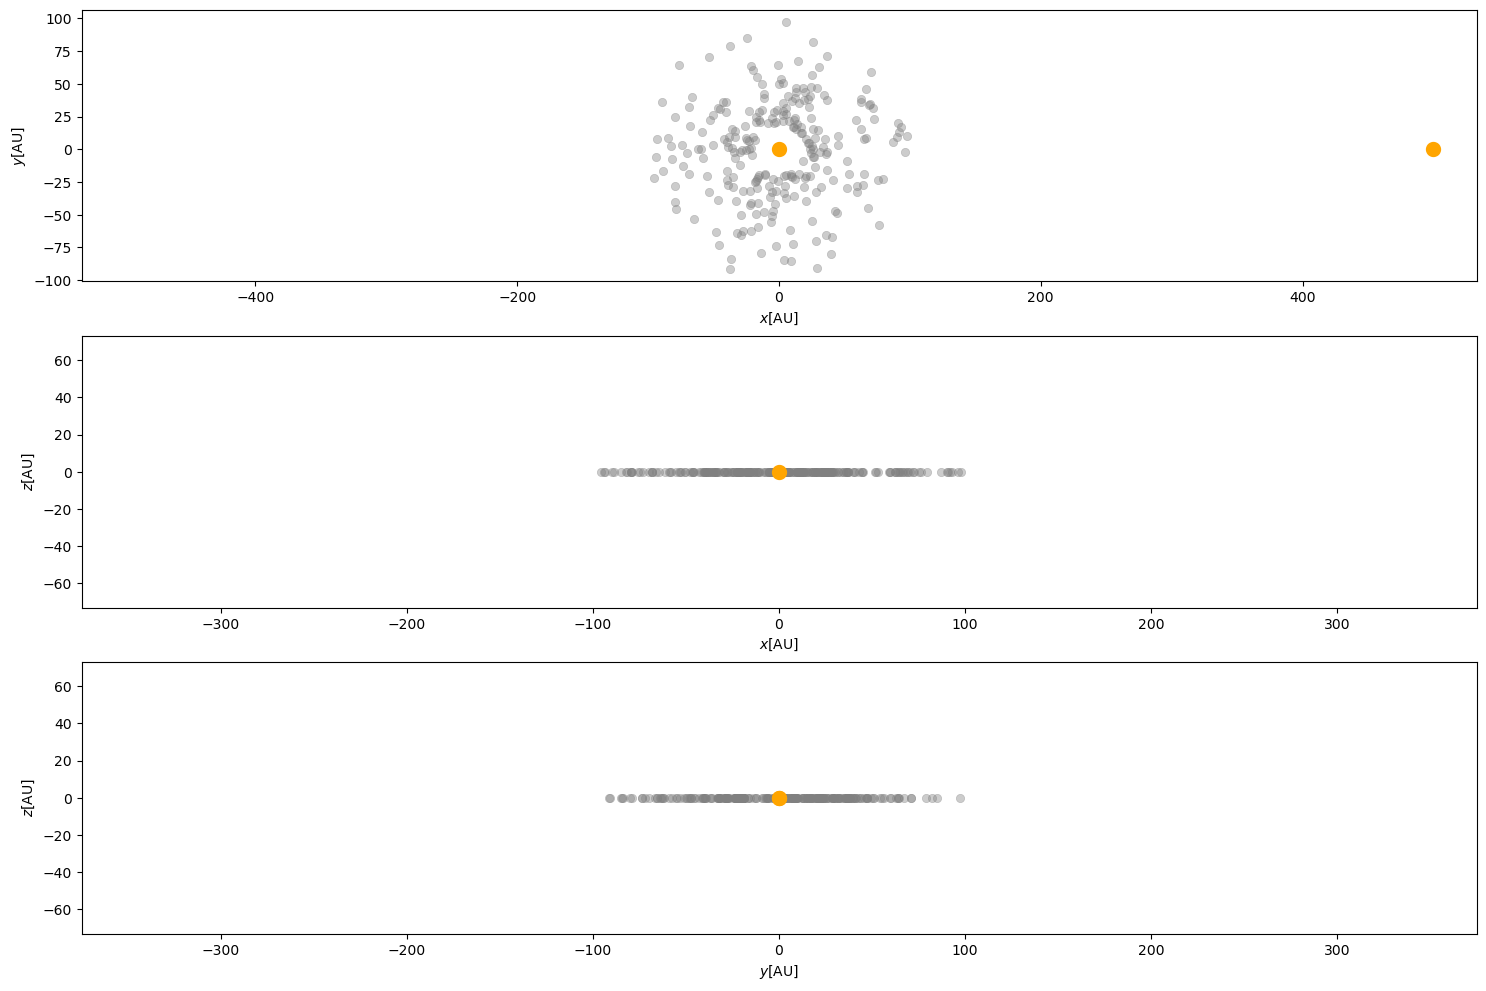

In [15]:
plot_snapshot(sim, a_b)

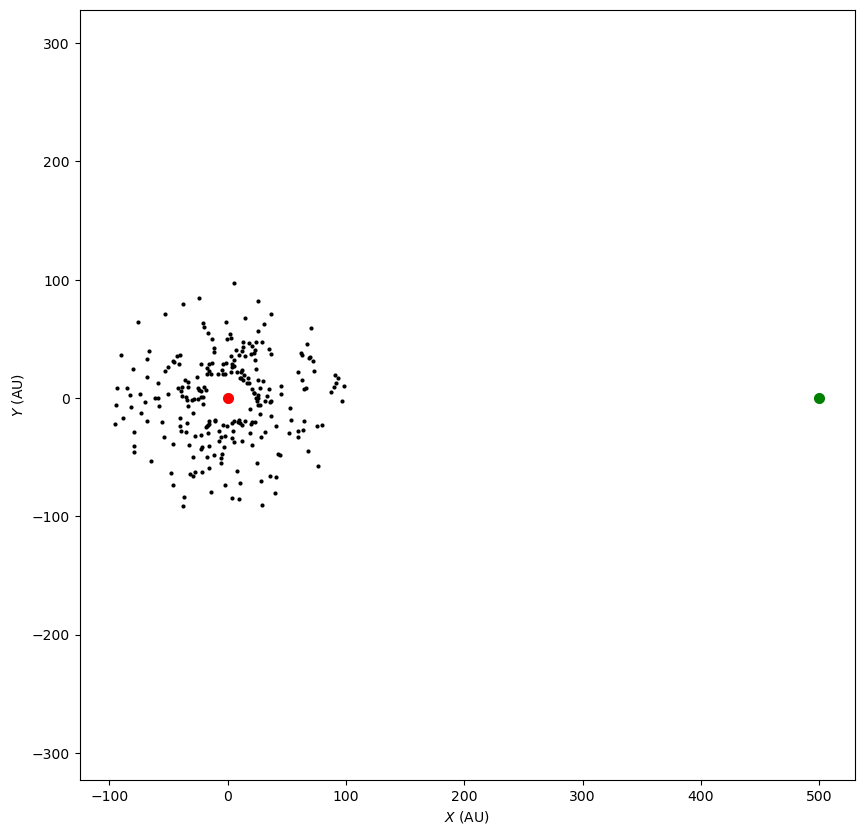

In [17]:
snapshot_xy(sim)

In [18]:
# Define integration time
tmax =  1e6 * 2* np.pi
tstep = 10 * 2 * np.pi
times = np.arange(0, tmax, tstep)
Nout = len(times) # number of time steps

sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

theta_db = np.zeros((Nout, sim.N-1))
theta_pb = np.zeros(Nout)
theta_dp = np.zeros((Nout, sim.N-1))


p = np.zeros((Nout, sim.N-1, 4))
for i, t in enumerate(times):
    sim.integrate(t)
    hvec = sim.particles[1].calculate_orbit(primary=sim.particles[0]).hvec
    hvec = np.array([hvec.x, hvec.y, hvec.z])/np.linalg.norm([hvec.x, hvec.y, hvec.z])
    theta_pb[i] = np.arccos(np.dot([0,0,1], hvec))

    for n in range(sim.N-2):
        orbit = sim.particles[n+1].calculate_orbit(primary=sim.particles[0])
        a = orbit.a
        e = orbit.e
        pomega = orbit.pomega
        inc = orbit.inc
        p[i][n+1] = a, e, pomega, inc

        testp_hvec = orbit.hvec
        testp_hvec = np.array([testp_hvec.x, testp_hvec.y, testp_hvec.z])/np.linalg.norm([testp_hvec.x, testp_hvec.y, testp_hvec.z])
        theta_db[i, n+1] = np.arccos(np.dot(hvec, testp_hvec))
        
        
        theta_dp[i, n+1] = np.arccos(np.dot(initial_disk_hvec, testp_hvec))

NameError: name 'initial_disk_hvec' is not defined

IndexError: index 100 is out of bounds for axis 0 with size 100

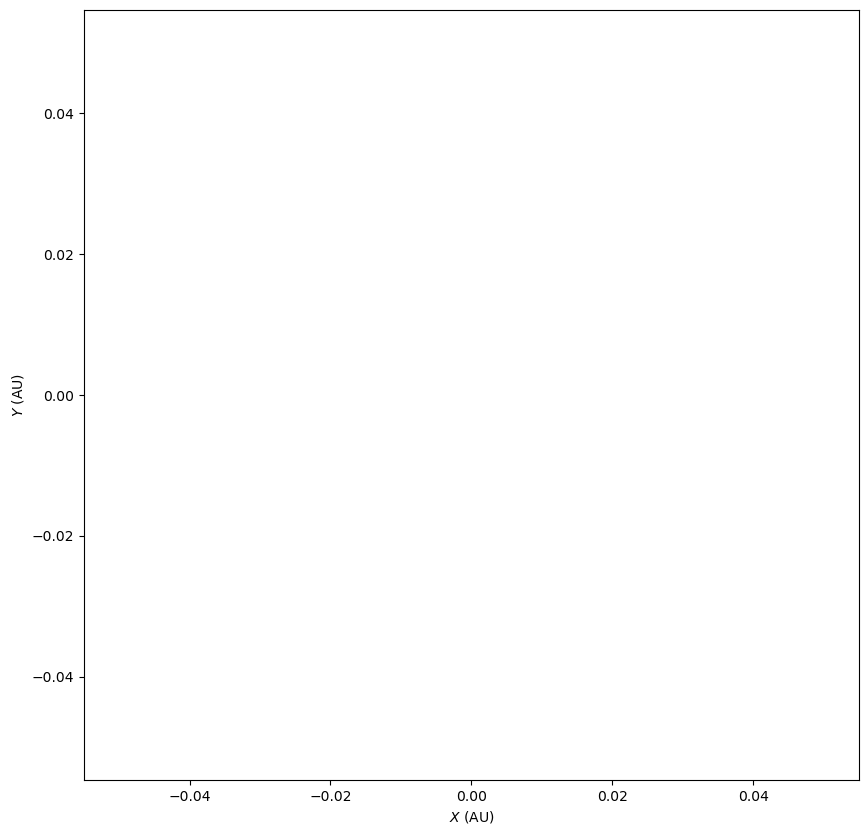

In [19]:
time_xy(sim)

In [20]:
def time_yz(sim):
    fig = plt.figure(figsize=(10,10))
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$Y$ (AU)")
    ax.axis('equal')
    
    yz=np.zeros((N_out,N_particles,2))
    for j, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        for k, p in enumerate(sim.particles[1:-1]):
            yz[j][k]=[p.y,p.z]    

        plt.scatter(sim.particles[0].y, sim.particles[0].z,marker=".",color='r',linewidth=5)
        plt.scatter(sim.particles[1].y, sim.particles[1].z,marker=".",color='g',linewidth=5)
        plt.scatter(yz[2:,2:,0],yz[2:,2:,1],marker=".",color='k',linewidth=0)

def time_xy(sim):
    fig = plt.figure(figsize=(10,10))
    ax=plt.subplot()
    ax.set_ylabel("$Y$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')    

    xy=np.zeros((N_out,N_particles,2))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        for j, p in enumerate(sim.particles[1:-1]):
            xy[i][j]=[p.x,p.y]    
    
        plt.scatter(sim.particles[0].x, sim.particles[0].y,marker=".",color='r',linewidth=5)
        plt.scatter(sim.particles[1].x, sim.particles[1].y,marker=".",color='g',linewidth=5)
        plt.scatter(xy[2:,2:,0],xy[2:,2:,1],marker=".",color='k',linewidth=0)

def time_xz(sim):
    fig = plt.figure(figsize=(10,10))
    ax=plt.subplot()
    ax.set_ylabel("$Z$ (AU)")
    ax.set_xlabel("$X$ (AU)")
    ax.axis('equal')

    xz=np.zeros((N_out,N_particles,2))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        for k, p in enumerate(sim.particles[1:-1]):
            xz[i][k]=[p.x,p.z]    

        plt.scatter(sim.particles[0].x, sim.particles[0].z,marker=".",color='r',linewidth=5)
        plt.scatter(sim.particles[1].x, sim.particles[1].z,marker=".",color='g',linewidth=5)
        plt.scatter(xz[2:,2:,0],xz[2:,2:,1],marker=".",color='k',linewidth=0)

In [21]:
Time=100.*2*np.pi
N_out=10
times=np.linspace(0,Time,N_out)

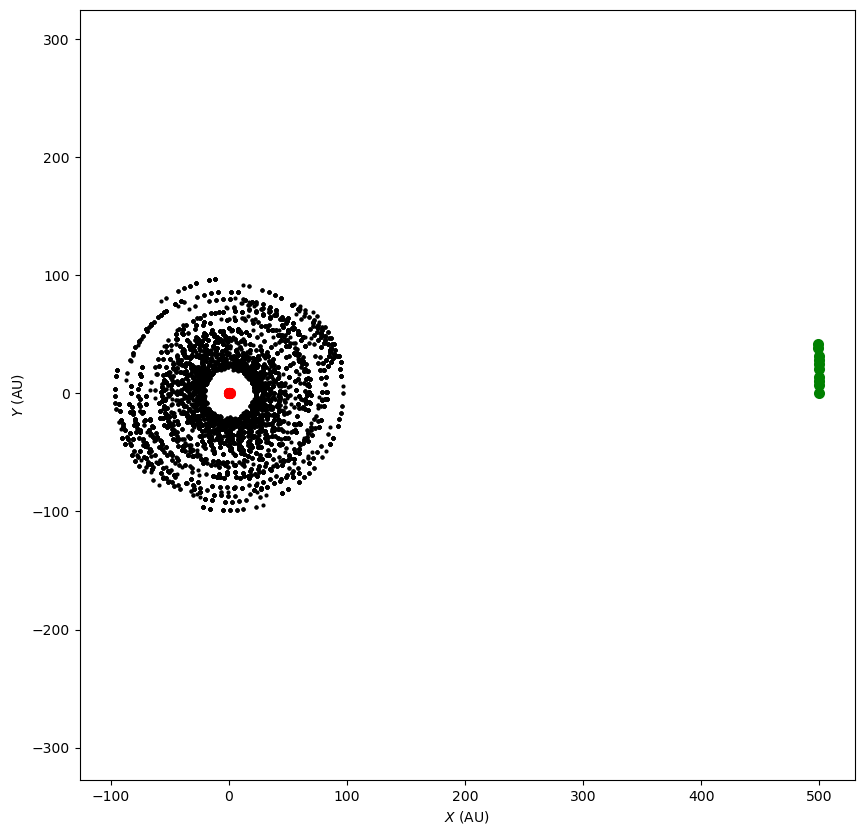

In [22]:
time_xy(sim)

In [ ]:
#Animation

import rebound
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and axes for the scatter plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True, gridspec_kw={'hspace': 0.5})
fig.subplots_adjust(top=0.85)


scatter_xy = ax[0].scatter([], [], marker='.',color="black",linewidth=.5)
scatter_xyprimary = ax[0].scatter([], [], marker='o',color="red",linewidth=2)
scatter_xycompanion = ax[0].scatter([], [], marker='o',color='r',linewidth=2)

scatter_yz = ax[1].scatter([], [], marker='.',color='black',linewidth=.5)
scatter_yzprimary = ax[1].scatter([], [], marker='o',color='r',linewidth=2)
scatter_yzcompanion = ax[1].scatter([], [], marker='o',color='r',linewidth=2)

scatter_xz = ax[2].scatter([], [], marker='.',color = 'black',linewidth=.5)
scatter_xzprimary = ax[2].scatter([], [], marker='o',color='r',linewidth=2)
scatter_xzcompanion = ax[2].scatter([], [], marker='o',color='r',linewidth=2)

scatters = [scatter_xy, scatter_xyprimary,scatter_xycompanion, scatter_yz, scatter_yzprimary,scatter_yzcompanion, scatter_xz, scatter_xzprimary,scatter_xzcompanion,]

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1, a=500, e=0.05, inc=np.radians(10))

sim.integrator = "whfast"
sim.N_active = 2

Testparticle = 250
a_initial = np.linspace(20, 100, Testparticle)
for a in a_initial:
    sim.add(primary=sim.particles[0], a=a, f=np.random.rand() * 2. * np.pi, e=0)

sim.dt = sim.particles[2].calculate_orbit(primary=sim.particles[0]).P / 10.12345

N_out = 800
Time = 1000000. * 2 * np.pi
xy = np.zeros((N_out, Testparticle, 2))
times = np.linspace(0., Time, N_out)


# Animation update function
def update(frame):
    # Evolve the simulation by one time step
    sim.integrate(times[frame])
    center_x = sim.particles[0].y
    center_y = sim.particles[0].z
    center_z = sim.particles[0].x

    # Update the scatter plot data with the current positions of the particles
    y = [sim.particles[i].y - center_x for i in range(0, Testparticle)]
    z = [sim.particles[i].z - center_y for i in range(0, Testparticle)]
    x = [sim.particles[i].x - center_z for i in range(0, Testparticle)]

    x1 = [sim.particles[0].x - center_z]
    y1 = [sim.particles[0].y - center_x]
    z1 = [sim.particles[0].z - center_y]

    x2 = [sim.particles[1].x - center_z]
    y2 = [sim.particles[1].y - center_x]
    z2 = [sim.particles[1].z - center_y]

    ax[0].set_xlim(-600, 600)
    ax[0].set_ylim(-600, 600)
    ax[1].set_xlim(-600, 600)
    ax[1].set_ylim(-600, 600)
    ax[2].set_xlim(-600, 600)
    ax[2].set_ylim(-600, 600)

    scatter_xy.set_offsets(np.column_stack((x, y)))
    scatter_xyprimary.set_offsets(np.column_stack((x1, y1)))
    scatter_xycompanion.set_offsets(np.column_stack((x2, y2)))

    scatter_yz.set_offsets(np.column_stack((y, z)))
    scatter_yzprimary.set_offsets(np.column_stack((y1, z1)))
    scatter_yzcompanion.set_offsets(np.column_stack((y2, z2)))


    scatter_xz.set_offsets(np.column_stack((x, z)))
    scatter_xzprimary.set_offsets(np.column_stack((x1, z1)))
    scatter_xzcompanion.set_offsets(np.column_stack((x2, z2)))

    #scatter_xy.set_color(['black'])
    #scatter_yz.set_color(['g'])
    #scatter_xz.set_color(['r'])

#    alpha = frame / N_out
#    scatter_xycompanion.set_alpha(alpha)
#    scatter_yzcompanion.set_alpha(alpha)
#    scatter_xzcompanion.set_alpha(alpha)


    return scatters

# Animation initialization function
def init():
    scatter_xy.set_offsets(np.zeros((Testparticle, 2)))
    scatter_xyprimary.set_offsets(np.zeros((1, 2))) 
    scatter_xycompanion.set_offsets(np.zeros((1, 2)))

    scatter_yz.set_offsets(np.zeros((Testparticle, 2)))
    scatter_yzprimary.set_offsets(np.zeros((1, 2))) 
    scatter_yzcompanion.set_offsets(np.zeros((1, 2)))    
    
    scatter_xz.set_offsets(np.zeros((Testparticle, 2)))
    scatter_xzprimary.set_offsets(np.zeros((1, 2))) 
    scatter_xzcompanion.set_offsets(np.zeros((1, 2)))


    return scatters

animation = FuncAnimation(fig, update, frames=200, init_func=init, blit=True)

ax[0].set_ylabel("$Y$ (AU)")
ax[0].set_xlabel("$X$ (AU)")
ax[0].set_title("XY Projection")
ax[1].set_ylabel("$Z$ (AU)")
ax[1].set_xlabel("$Y$ (AU)")
ax[1].set_title("YZ Projection")
ax[2].set_ylabel("$Z$ (AU)")
ax[2].set_xlabel("$X$ (AU)")
ax[2].set_title("XZ Projection")

fig.suptitle("500 (AU) Companion | 6 Myr Evolution", fontsize=16)

animation.save("TestAnimationProjectionsTest2.mp4", writer='ffmpeg')